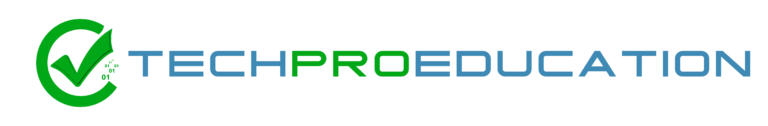

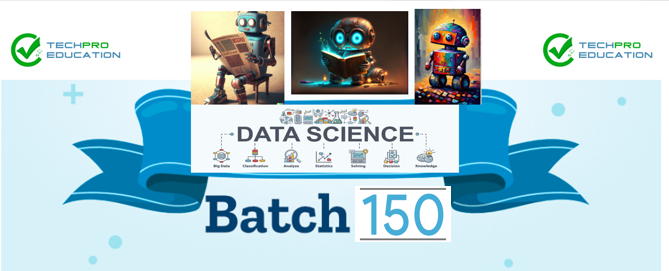

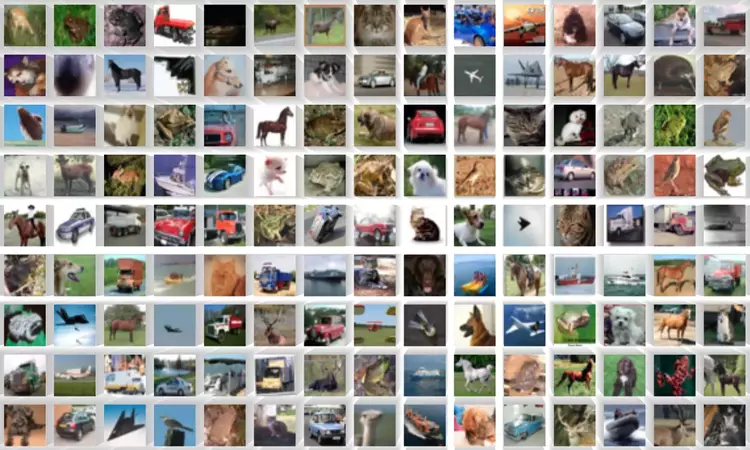

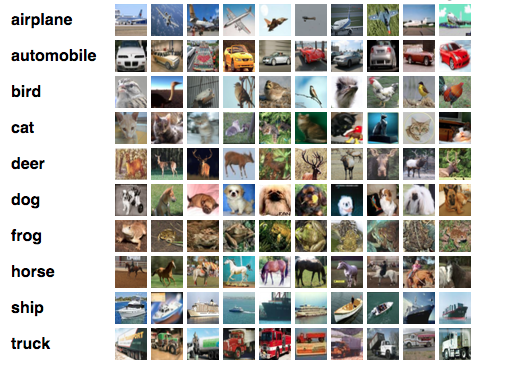

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 26s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

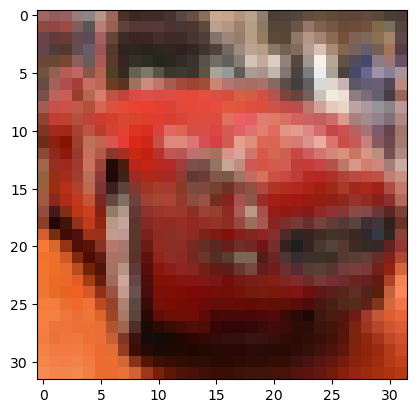

In [7]:
plt.imshow(X_train[5])

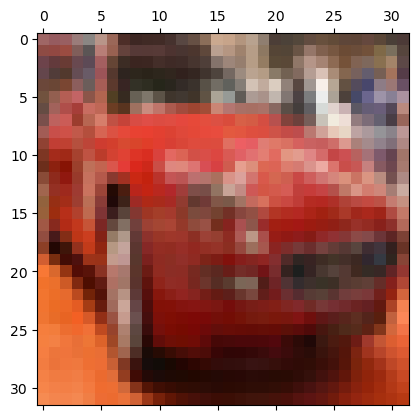

In [8]:
plt.matshow(X_train[5])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
classes[int(y_train[3])]   # bunu indeksleyebiliyoruz. 

'deer'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

28910

In [17]:
np.random.randint(low=0, high=50000, size=17) 

array([45782, 13560, 45919, 24358,  1527, 14747, 45407, 27089, 48012,
       23742, 14720, 22150, 13018, 40134, 39188, 25853, 33369])

In [18]:
np.random.randint(low=0, high=50000, size=17) 

array([ 2736, 17322, 35018, 46458, 34699, 37660, 41985, 10420, 40299,
       13486, 30839, 28282,  2820, 25545, 31321, 39509, 47020])

In [19]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

array([[[139, 163, 193],
        [158, 181, 209],
        [176, 195, 221],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[128, 150, 177],
        [150, 169, 195],
        [171, 188, 211],
        ...,
        [253, 254, 253],
        [249, 250, 250],
        [254, 255, 254]],

       [[129, 148, 173],
        [157, 174, 199],
        [186, 202, 223],
        ...,
        [247, 250, 249],
        [243, 246, 245],
        [247, 251, 250]],

       ...,

       [[ 89,  90,  66],
        [ 97, 101,  73],
        [ 74,  77,  52],
        ...,
        [ 54,  64,  61],
        [ 57,  64,  60],
        [ 50,  56,  50]],

       [[ 66,  69,  49],
        [ 67,  73,  50],
        [ 60,  64,  47],
        ...,
        [ 64,  73,  74],
        [ 52,  61,  60],
        [ 36,  42,  39]],

       [[ 43,  52,  36],
        [ 36,  47,  32],
        [ 43,  52,  42],
        ...,
        [ 77,  85,  86],
        [ 88,  96,  97],
        [ 65,  71,  73]]

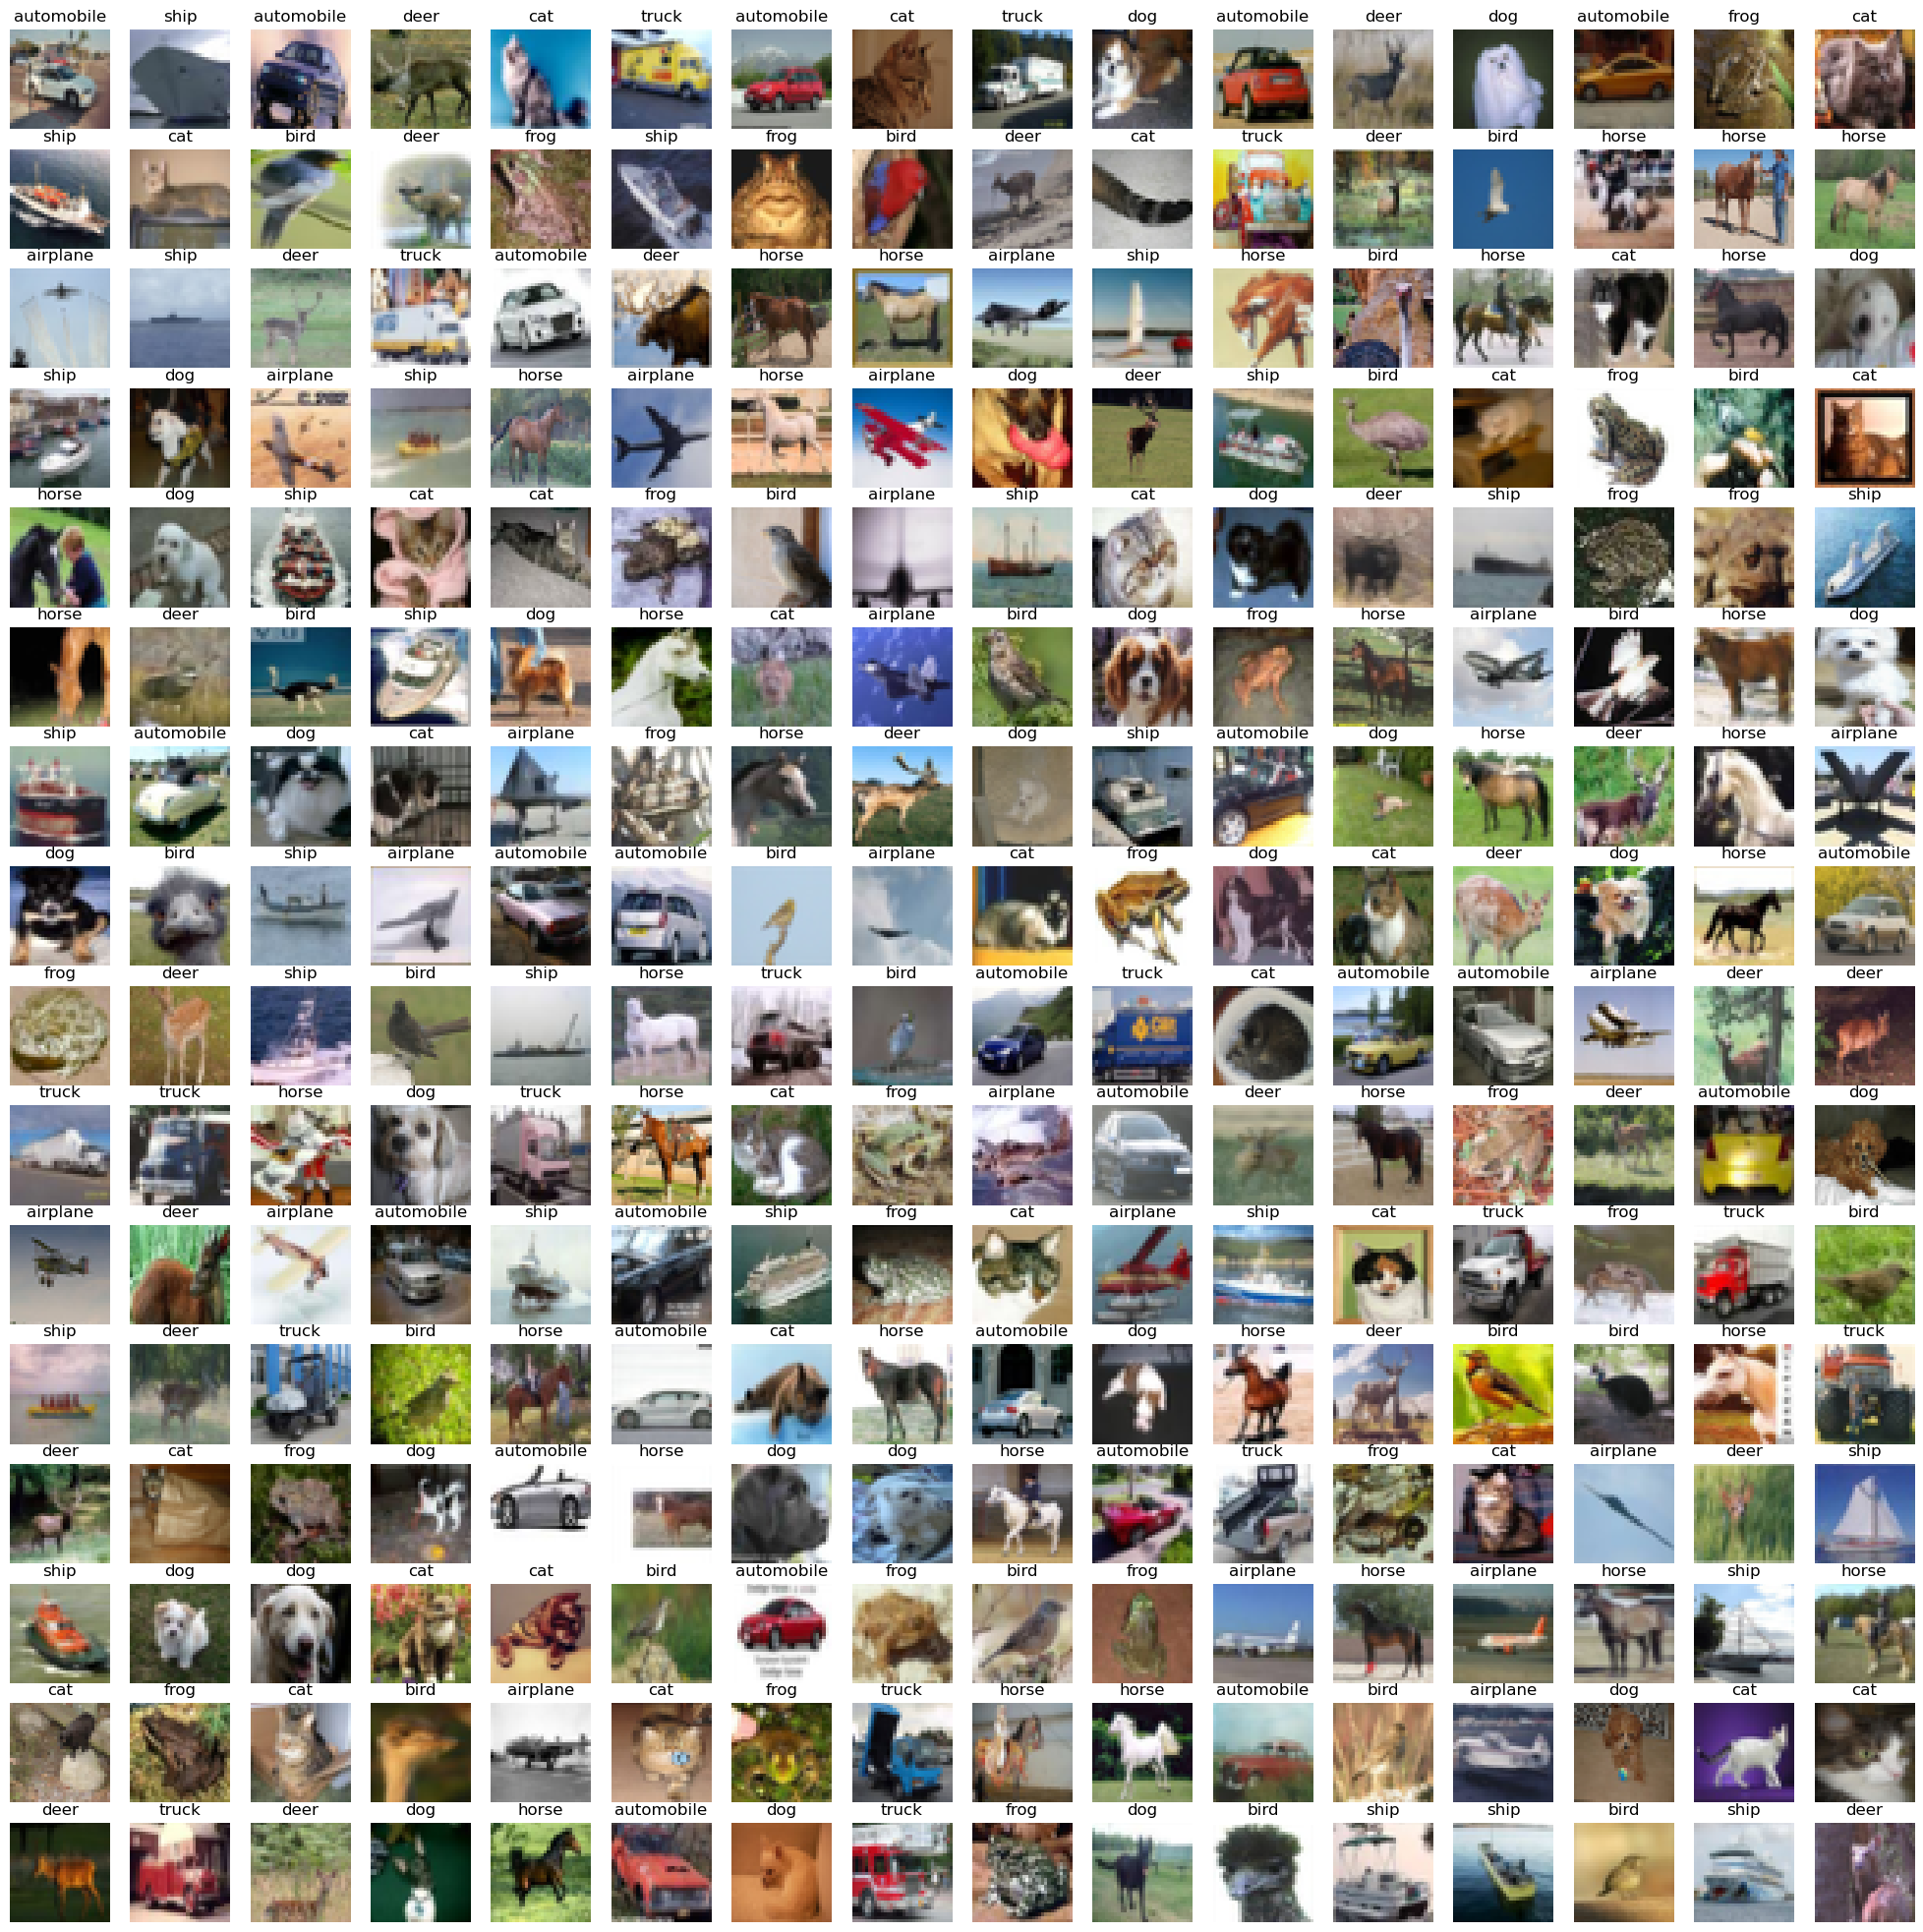

In [20]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [21]:
X_train[5].min()

0

In [22]:
X_train[5].max()

252

In [23]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train[5].min()

0.0

In [25]:
X_train[5].max()

0.9882353

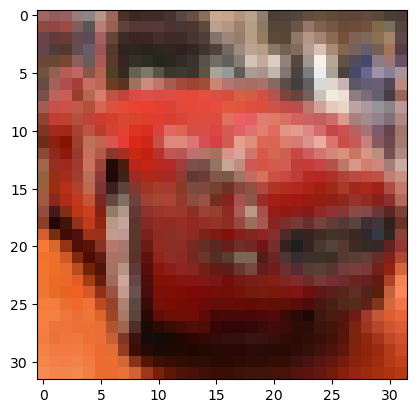

In [26]:
plt.imshow(X_train[5])

In [27]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

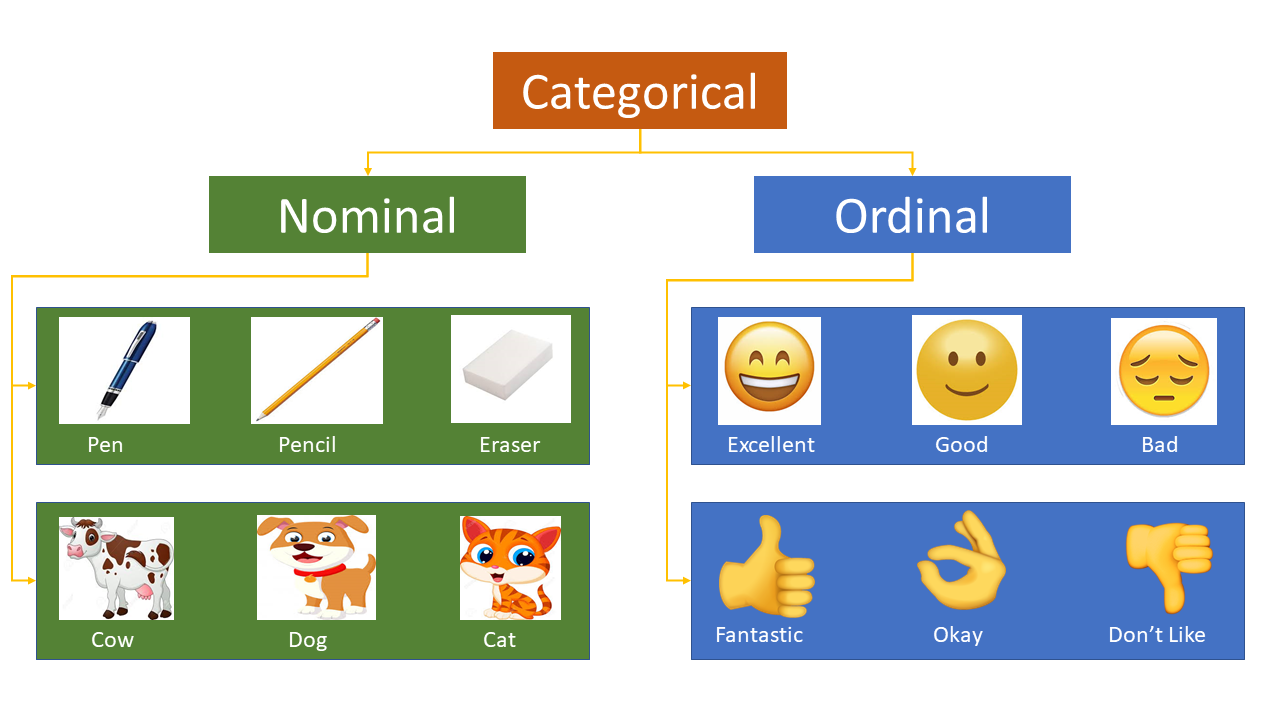

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 285s 180ms/step - loss: 1.4475 - accuracy: 0.4771 - val_loss: 1.1757 - val_accuracy: 0.5850
Epoch 2/50
1563/1563 [==============================] - 307s 196ms/step - loss: 1.0089 - accuracy: 0.6427 - val_loss: 0.9518 - val_accuracy: 0.6644
Epoch 3/50
1563/1563 [==============================] - 287s 184ms/step - loss: 0.8430 - accuracy: 0.7056 - val_loss: 0.8680 - val_accuracy: 0.6991
Epoch 4/50
1563/1563 [==============================] - 310s 198ms/step - loss: 0.7382 - accuracy: 0.7403 - val_loss: 0.8721 - val_accuracy: 0.6944
Epoch 5/50
1563/1563 [==============================] - 293s 188ms/step - loss: 0.6611 - accuracy: 0.7674 - val_loss: 0.8545 - val_accuracy: 0.7094
Epoch 6/50
1563/1563 [==============================] - 302s 193ms/step - loss: 0.5869 - accuracy: 0.7928 - val_loss: 0.8260 - val_accuracy: 0.7168
Epoch 7/50
1563/1563 [==============================] - 288s 185ms/step - loss: 0.5240 - accuracy: 0.8162 - val_

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.history.history

{'loss': [1.4474995136260986,
  1.0089398622512817,
  0.8430382013320923,
  0.7382409572601318,
  0.6611121892929077,
  0.5868540406227112,
  0.5239758491516113,
  0.46426254510879517,
  0.41770562529563904,
  0.3639928102493286,
  0.33041414618492126],
 'accuracy': [0.4771000146865845,
  0.6427199840545654,
  0.7056400179862976,
  0.7402999997138977,
  0.7674199938774109,
  0.7927799820899963,
  0.8162000179290771,
  0.835860013961792,
  0.8520600199699402,
  0.8706799745559692,
  0.8828999996185303],
 'val_loss': [1.1757230758666992,
  0.9518085718154907,
  0.8680485486984253,
  0.8720606565475464,
  0.8544877767562866,
  0.8260390758514404,
  0.9126189351081848,
  0.931057333946228,
  0.9642938375473022,
  0.9565929770469666,
  1.0924080610275269],
 'val_accuracy': [0.5849999785423279,
  0.6643999814987183,
  0.6991000175476074,
  0.6944000124931335,
  0.7093999981880188,
  0.7167999744415283,
  0.7088000178337097,
  0.7106999754905701,
  0.7095999717712402,
  0.722599983215332,
  0

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.447500,0.47710,1.175723,0.5850
1,1.008940,0.64272,0.951809,0.6644
2,0.843038,0.70564,0.868049,0.6991
3,0.738241,0.74030,0.872061,0.6944
4,0.661112,0.76742,0.854488,0.7094


In [ ]:
# Skor kotu gelirse: 
# 0) Hic bir seyi degistirmeden bir daha calistir
# 1) Padding --> valid yapilabilir
# 2) Model sade ise  Aktivasyon fonk degistirebilirsin, filtre sayisi degistirilebilir, batch size degistirilebilir, yapinin katmanlari artirilabilir. 
# 3) Drop Out, batch normalization eklenebilir.  
# 4) f1 Skoru dusuk gelen neseneden yeni data yukle
# 5) Transfer learning (prerained modeller) kullanilabilir. 
# 6) Computer Vision tarafina gec. Dusuk cikan resmini belli bir kismina odaklanarak calis. 

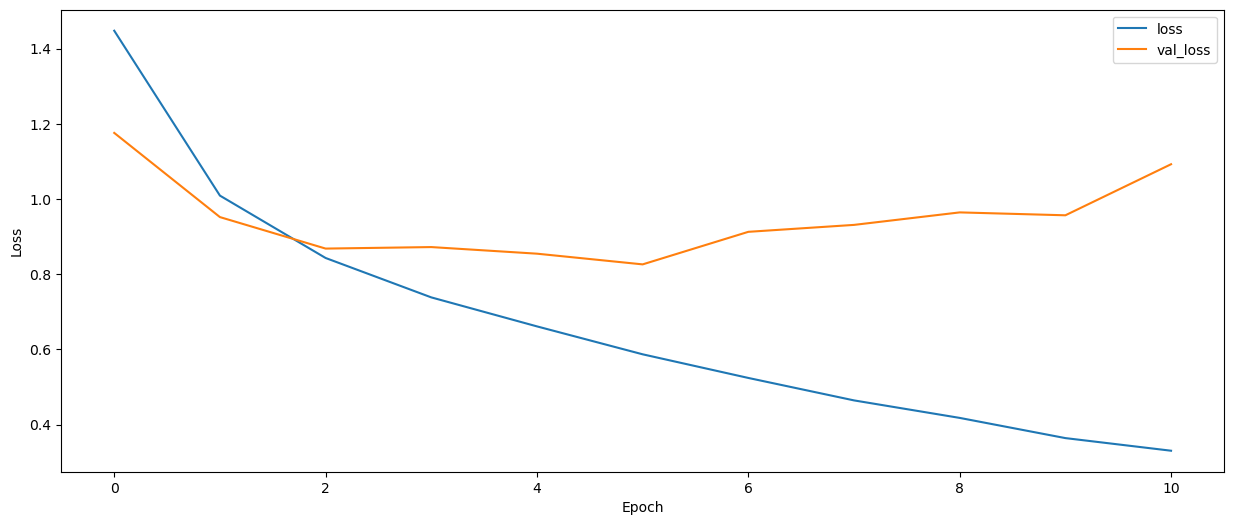

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

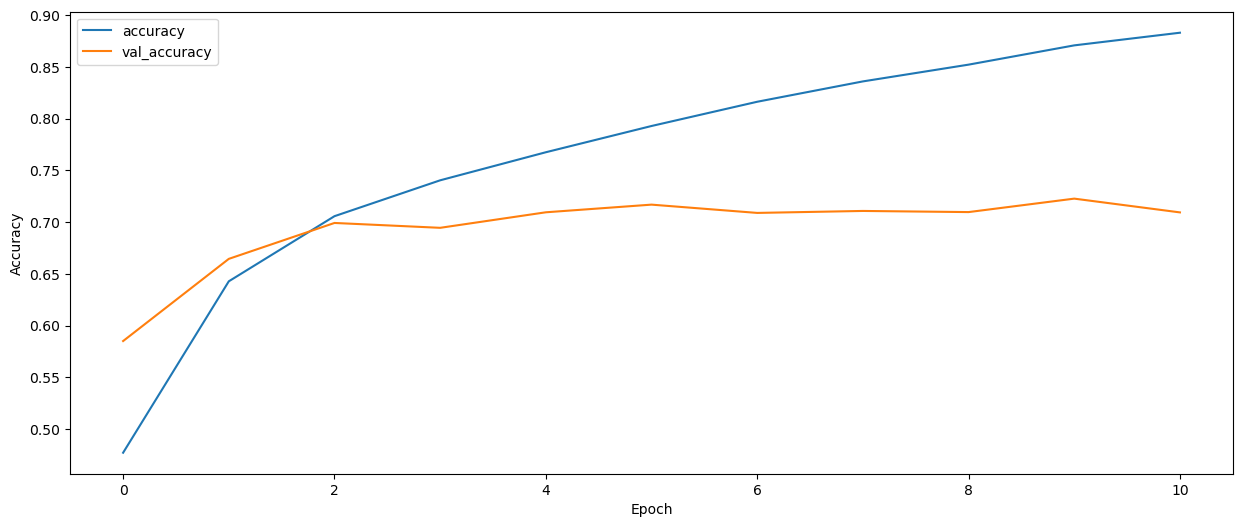

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 11s 36ms/step - loss: 1.0924 - accuracy: 0.7093
[1.0924080610275269, 0.7092999815940857]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [44]:
preds = model.predict(X_test)


313/313 [==============================] - 9s 29ms/step


In [45]:
predictions = np.argmax(preds, axis=1)

In [46]:
predictions

array([3, 8, 0, ..., 5, 4, 7], dtype=int64)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1000
           1       0.90      0.77      0.83      1000
           2       0.63      0.59      0.61      1000
           3       0.47      0.56      0.51      1000
           4       0.72      0.62      0.67      1000
           5       0.57      0.63      0.60      1000
           6       0.72      0.80      0.76      1000
           7       0.74      0.75      0.75      1000
           8       0.86      0.80      0.83      1000
           9       0.86      0.78      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [48]:
print(confusion_matrix(y_test, predictions))

[[790   9  54  34  21   8  12  19  34  19]
 [ 42 765  15  25   9   8  17   4  31  84]
 [ 61   3 591  91  59  75  70  40   7   3]
 [ 26   4  58 560  47 183  82  29   7   4]
 [ 15   1  60  87 625  65  61  78   7   1]
 [  9   3  52 194  31 626  25  50   9   1]
 [  7   2  51  81  17  32 801   5   3   1]
 [ 14   1  36  60  42  76  10 751   6   4]
 [ 79  20  12  32   8   9  17   6 802  15]
 [ 52  46   6  34   5   9  10  27  29 782]]


In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0924080610275269
Test accuracy: 0.7092999815940857


In [50]:
my_image = X_test[44]

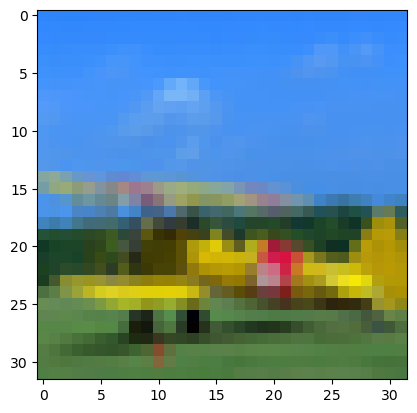

In [51]:
plt.imshow(my_image)

In [52]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 35ms/step


In [53]:
image_prediction

array([[9.9837035e-01, 2.3690486e-04, 2.7074432e-04, 4.9518536e-07,
        2.6985988e-04, 6.9020963e-08, 7.1471788e-09, 1.2283144e-05,
        7.0966646e-04, 1.2969991e-04]], dtype=float32)

In [54]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [55]:
result=np.argmax(image_prediction, axis=1)

In [56]:
result

array([0], dtype=int64)

In [57]:
classes[int(result)]

'airplane'

In [58]:
#model.save("cnn-1.h5")

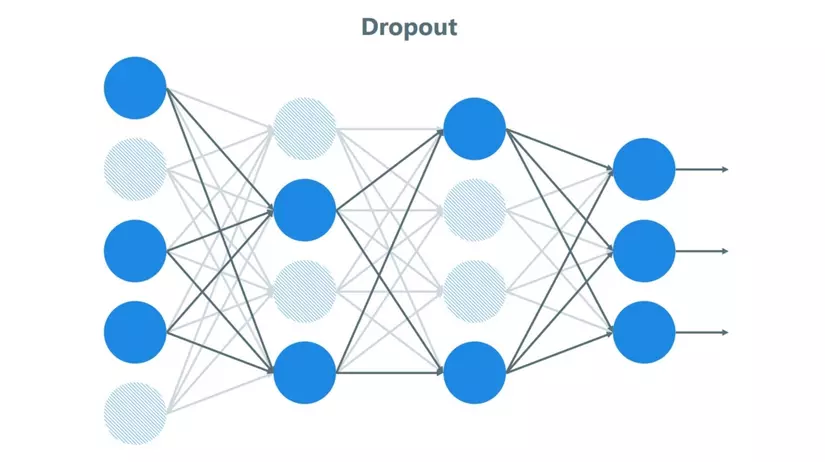

In [59]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [60]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

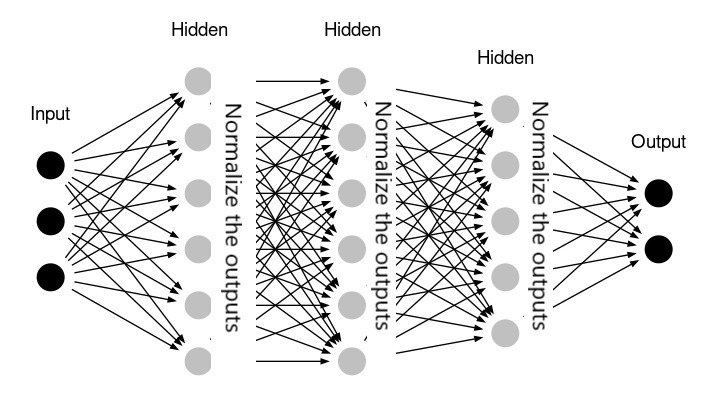

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

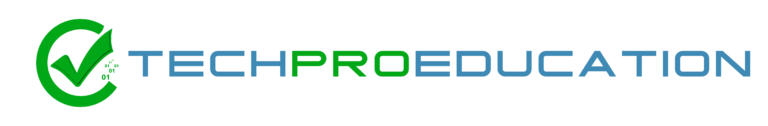